In [1]:
# TODO: explain how to run this, and that they only need the gist (loads tools)

# wranglign ---------
import pandas as pd
from siuba import *

# plotting ----------
from plotnine import *

theme_set(theme_classic(base_family = "Noto Sans CJK JP"))

# data --------------
#fname = "/Users/machow/Dropbox/Repo/siublocks-org/intro-tidyverse/tutorial/data/music200.csv"
fname = "https://siublocks.s3.us-east-2.amazonaws.com/course-data/music200.csv"
music_top200 = pd.read_csv(fname)

# tracks
#fname = "/Users/machow/Dropbox/Repo/siublocks-org/intro-tidyverse/tutorial/data/track_features.csv"
fname = "https://siublocks.s3.us-east-2.amazonaws.com/course-data/track_features.csv"
track_features = pd.read_csv(fname)

# student support ----------
from siuba import pipe
from IPython.display import HTML, display
from siututor import Blank
___ = Blank()

# DataFrame display --------
pd.set_option("display.max_rows", 6)

from IPython import get_ipython
# special ipython function to get the html formatter
html_formatter = get_ipython().display_formatter.formatters['text/html']

# here, we avoid the default df._repr_html_ method, since it inlines css
# (style tags make vue angry)
html_formatter.for_type(
    pd.DataFrame,
    lambda df: df.to_html(max_rows = pd.get_option("display.max_rows"), show_dimensions = True)
)



### Exercise 1: 

In this exercise, there are two code cells. The first defines variables for tracks by different artists. The second creates a plot.

Read through the code and plot, and then answer the question beneath.

In [2]:
roddy = (
  track_features
  >> filter(_.artist == "Roddy Ricch")
)

billie = (
  track_features
  >> filter(_.artist == "Billie Eilish")
)

other = (
  track_features
  >> filter(_.artist == "ITZY")
)

other

,artist,album,track_name,energy,valence,danceability,speechiness,acousticness,popularity,duration
1432,ITZY,IT'z Different,달라달라 (DALLA DALLA),0.853,0.713,0.790,0.0665,0.00116,73,199.874
21149,ITZY,IT'z Different,달라달라 DALLA DALLA,0.853,0.713,0.790,0.0665,0.00116,57,199.874
22389,ITZY,It'z Me,WANNABE,0.911,0.640,0.809,0.0617,0.00795,81,191.242
25288,ITZY,IT'z ICY,ICY,0.904,0.814,0.801,0.0834,0.03240,72,191.142


findfont: Font family ['Noto Sans CJK JP'] not found. Falling back to DejaVu Sans.


findfont: Font family ['Noto Sans CJK JP'] not found. Falling back to DejaVu Sans.


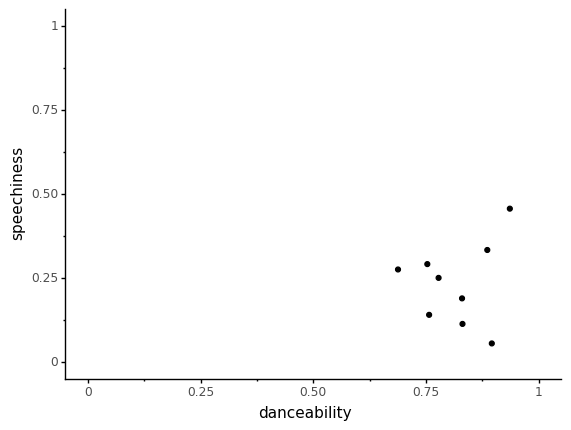

<ggplot: (-9223372036559026579)>

In [3]:
(roddy
  >> ggplot(aes("danceability", "speechiness"))
   + geom_point()
   + expand_limits(x = [0, 1], y = [0, 1])
)



<prompt-expandable header="Who has the widest range of danceability? (i.e. biggist difference between highest and lowest)">

<q-multiple-choice>
  <q-opt text="Roddy Ricch"><span>Try again.</span></q-opt>
  <q-opt text="Billie Eilish"><span>That's right!</span></q-opt>
  <q-opt text="ITZY"><span>Try again. All the ITZY songs shown have roughly the same danceability.</span></q-opt>
</q-multiple-choice>

</prompt-expandable>



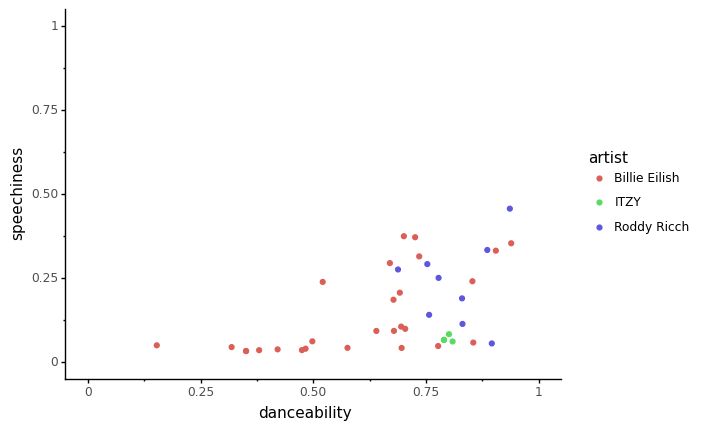

<ggplot: (295829417)>

In [4]:
import pandas as pd
all_together = pd.concat([roddy, billie, other])

(all_together
  >> ggplot(aes("danceability", "speechiness", color = "artist"))
   + geom_point()
   + expand_limits(x = [0, 1], y = [0, 1])
)

### Exercise 2:

Does it look like there any extremely popular songs over 15 minutes long?

There is not one concrete answer to this question.
Make a plot below, and come up with an answer you might share with another person.

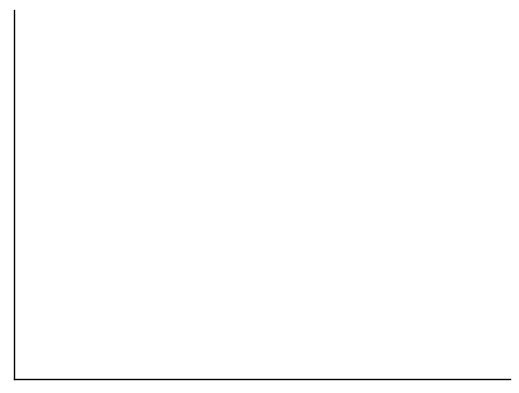

<ggplot: (274975969)>

In [5]:
(track_features
  >> ggplot()

)

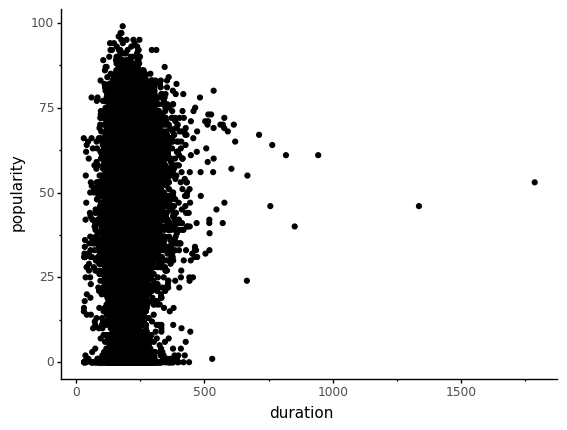

<ggplot: (274975801)>

In [6]:
(track_features
  >> ggplot(aes("duration", "popularity"))
   + geom_point()
)

<details>
<summary>possible answers</summary>
    
<a target="_blank" href="https://v.usetapes.com/XhWxJ9lAox">screencast</a>
    
    
</details>

### Exercise 3:

Does the lowest energy track belong to a "low energy" artist?

Filter the track_features data to create two variables

* **artist_low**: tracks for the artist with the lowest energy track.
* **artist_high**: tracks for the artist with the highest energy track.

After examining plots of both artists, does the one with the lowest energy track seem to have lower energy songs in general?

In [7]:
# this code is to help you examine track energy levels 

(
  track_features
  >> arrange(_.energy)
)

,artist,album,track_name,energy,valence,danceability,speechiness,acousticness,popularity,duration
1003,Simon Smith,Loops,Blagaslavlaju vas,0.000778,0.000,0.779,0.4210,0.99400,0,36.038
5996,DMS,Prepáčte,Nič,0.000791,0.000,0.571,0.4460,0.95000,25,37.355
16690,Peter Simon,Snowrain,Snowrain,0.003480,0.373,0.472,0.0517,0.99600,0,31.000
...,...,...,...,...,...,...,...,...,...,...
22696,Nino Xypolitas,Epireastika,Eime Enas Allos - Original,0.996000,0.517,0.644,0.1030,0.00346,34,214.693
17073,Otira,Soundboy Burnin’,Soundboy Burnin’,0.997000,0.327,0.568,0.2330,0.00299,14,173.846
11070,Scooter,No Time To Chill,How Much Is the Fish?,0.999000,0.615,0.533,0.0786,0.00130,48,226.200


In [8]:
# create artist_low variable here

artist_low = (
    
)

In [9]:
# create artist_high variable here

 

In [10]:
# examine plots of each artist, to answer question
# note, we're examining energy, so to make a scatterplot you could set
# the second variable to anything interesting (e.g. popularity)

(___

)

⚠️: <b>Don't forget to replace all the blanks!</b>

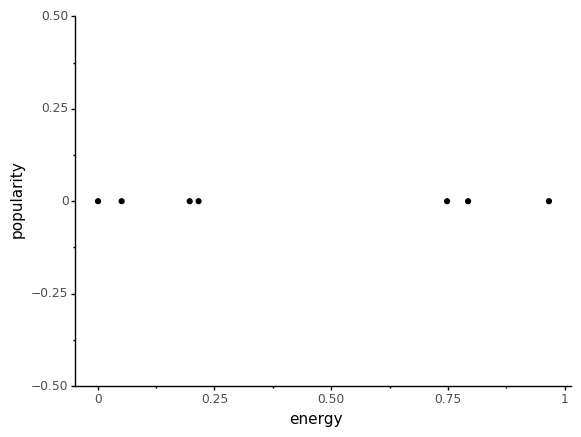

<ggplot: (-9223372036556993988)>

In [11]:
artist_low = track_features >> filter(_.artist == "Simon Smith")

artist_high = track_features >> filter(_.artist == "Scooter")

ggplot(artist_low, aes("energy", "popularity")) + geom_point()

#ggplot(artist_high, aes("energy", "popularity")) + geom_point()

<details><summary>possible answer</summary>

The high energy artist, Scooter, seems to only have high energy songs (from about .9 to 1 energy).
    
On the other hand, the low energy artist, Simon Smith, seems to have a wide range of energy values (from about 0 to 1 energy).
</details>